# CNN 모델 개발 복습

## LeNet-5을 cifar-10에 적용

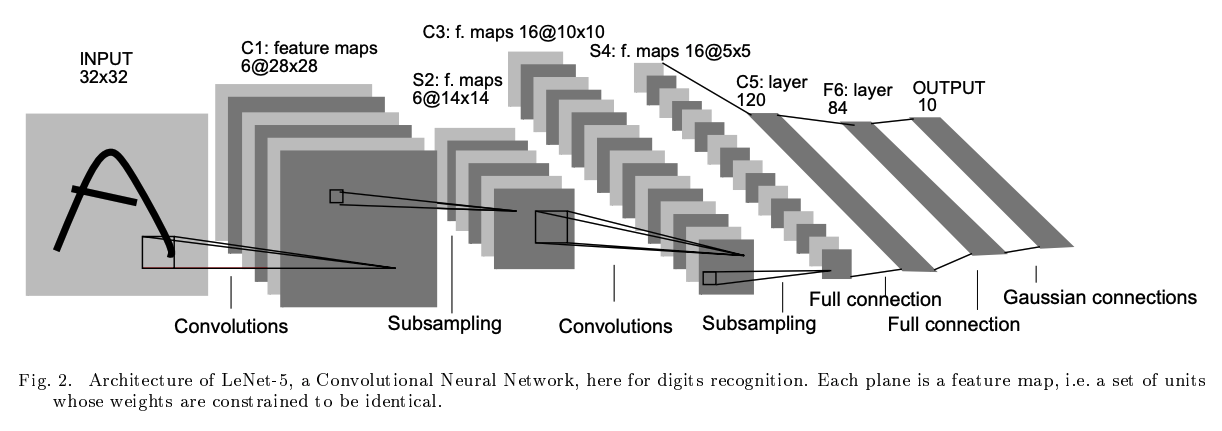

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))           # Conv2D에 3차원 이미지를 넣어야 함

# C1-layer : 6@28x28   (32x32 --> 28x28)
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))    # 필터 사이즈, 커널 사이즈(튜플),

# S2-layer : 6@14x14   (28x28 --> 14x14)
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))

# C3-layer : 16@10x10  (14x14 --> 10x10)
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))

# S4-layer : 16@5x5   (10x10 --> 5x5)
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))

# C5-layer
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10)

# Keras의 모델 학습과정 시각화



```
fit()함수는 학습 이력(History) 정보를 callback 객체로 리턴함.  
* loss : 훈련 손실값(train set에 대한)  
* accuracy : 훈련 정확도(train set에 대한)  
* val_loss : 검증 손실값(validation 셋을 지정했을 때만)   
* val_accuracy : 검증 정확도(validation set을 지정했을 때만)
```



In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습이력(callback) 데이터가 리턴 되지만 무시함.
# model.fit(train_x, train_y, batch_size=32, epochs=10)

# callback 데이터를 hist 변수에 저장
hist = model.fit(train_x, train_y, batch_size=32, epochs=10)

## 학습이력(history) 데이터 살펴보기



### history 객체는 다음과 같은 키(key)를 가지고 있음
> loss: 훈련 데이터에 대한 손실값  
> accuracy: 훈련 데이터에 대한 정확도  
> val_loss: 검증 데이터에 대한 손실값  
> val_accuracy: 검증 데이터에 대한 정확도

In [ ]:
hist # callback 데이터가 저장된 변수 보기

In [ ]:
hist.history
# 각 epoch별로 'loss'(실제값과 예측값의 차이의 합)과 'accuracy'정확도 데이터가 들어 있음.

In [ ]:
# 학습이력(history)를 판다스로 예쁘게 보기
import pandas as pd

hist_df = pd.DataFrame(hist.history)
hist_df

In [ ]:
# 여기서 잠깐??? 파이썬 dictionary에서 키를 통한 값의 접근
c24 = {'2401':"강현준", '2402':'경다인', '2403':'김도균'}

c24[????]    # 강현준을 출력하고 싶다면?

In [ ]:
# loss만 보기
hist.history[?????]

In [ ]:
# accuracy만 보기
hist.history[?????]

In [ ]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['????'])  # 훈련용 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['????']) # 훈련용 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 그래프 출력하기
plt.show()

# 계속 학습을 하면 loss는 낮아지고, accuracy는 더 높아질 것 같다.
## **더 학습 시켜 accuracy가 90%가 되면, 이 모델은 좋은 모델이 될까?**

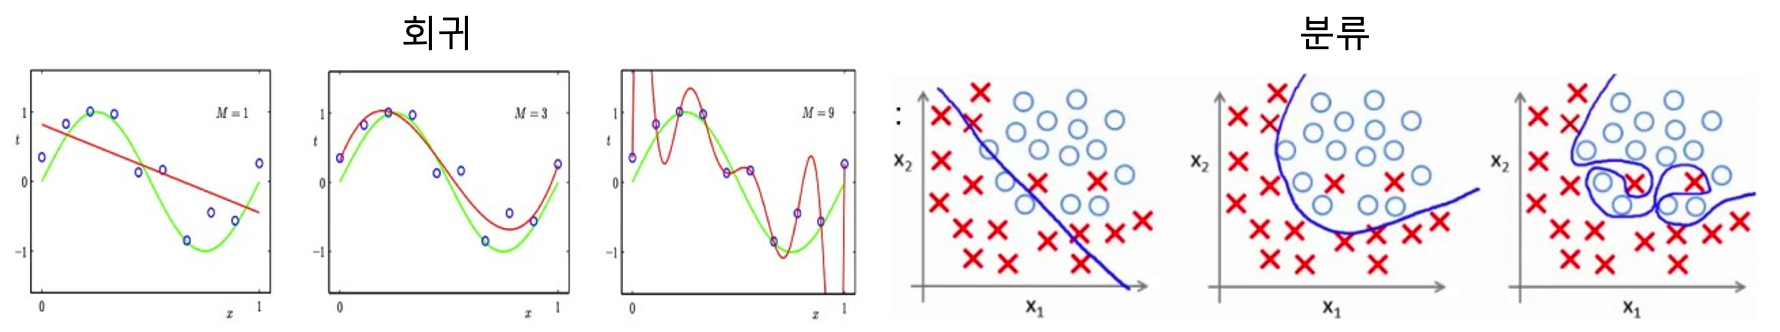

## 그림에서 언제(Epoch)까지 학습한 데이터가 모르는 데이터를 잘 예측할 수 있을까?

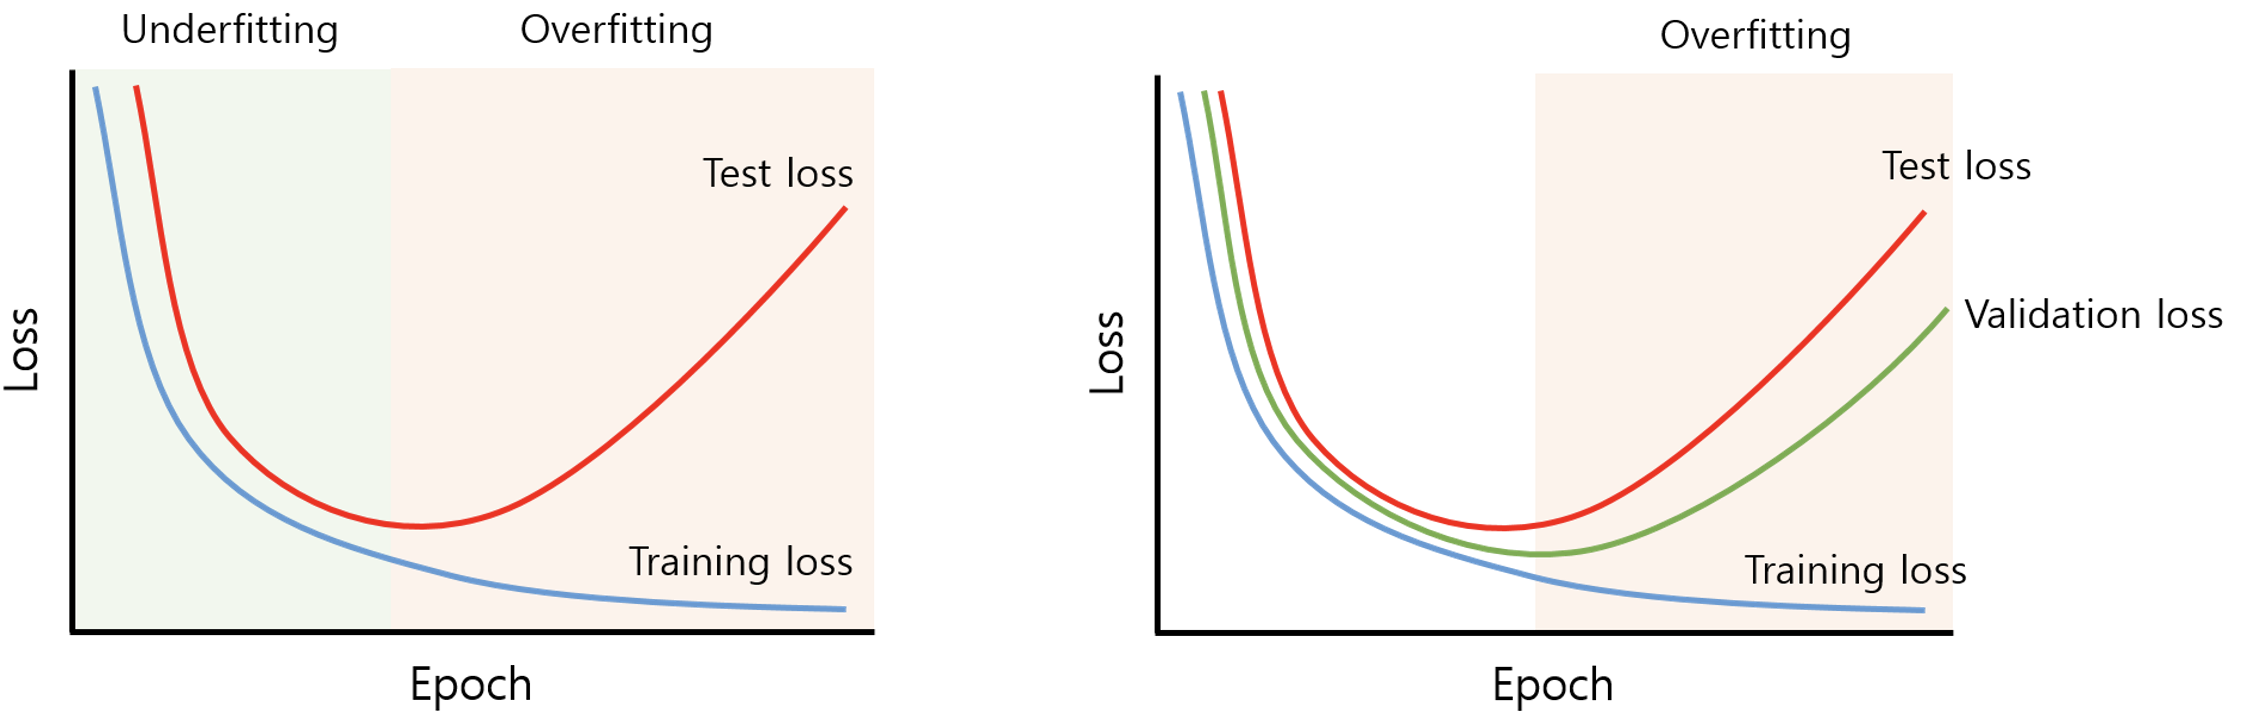

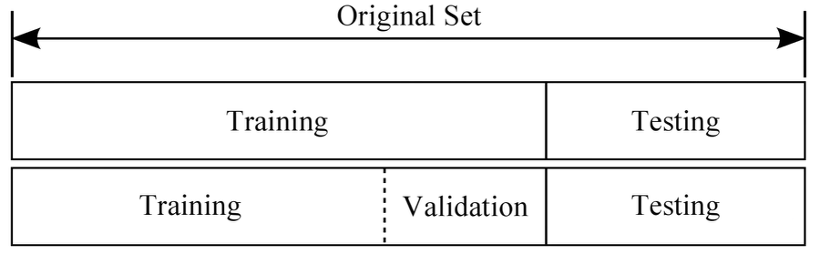

# cifar-10 CNN - train set에서 20%를 분리해, Validation set으로 사용 --> 과적합 시점 찾기

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# validation_split=0.2 (train_set 중 20%를 validation set으로 사용)
hist = model.fit(train_x, train_y, batch_size=32, epochs=20, validation_split=0.2)

In [ ]:
# 학습이력 확인해 보기
hist.history

# train 데이터의 loss : hist.history['loss']
# train 데이터의 accuracy : hist.history['accuracy']
# validation 데이터의 loss : hist.history['val_loss']
# validation 데이터의 accuracy : hist.history['val_accuracy']

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

# 과대적합 방지를 위한 학습 조기 종료 조건 넣기

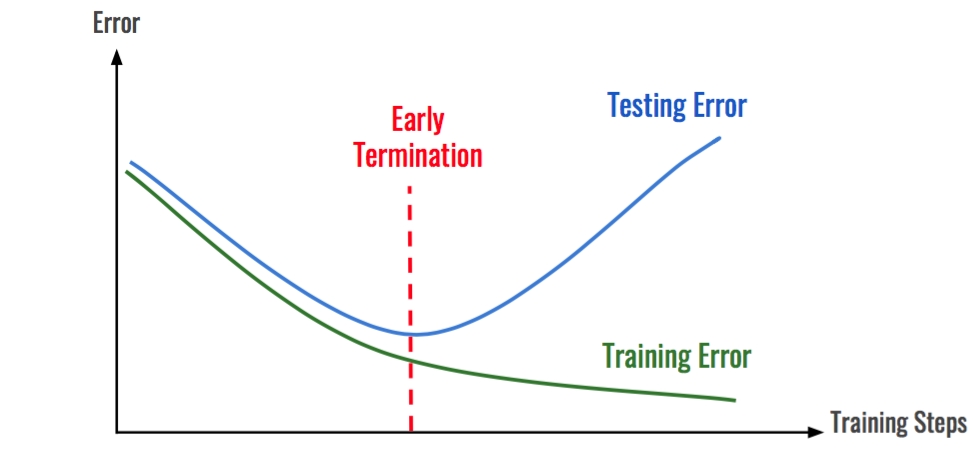

```
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, epoch = 1000, callbacks = [early_stopping])
```
> monitor : 학습 조기종료를 위해 관찰하는 항목입니다. val_loss 나 val_accuracy 가 주로 사용됩니다. (default : val_loss)  
> min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta 보다 적은 경우에는 개선이 없다고 판단합니다. (default = 0)  
> patience : 개선이 안된다고 바로 종료시키지 않고, 개선을 위해 몇번의 에포크를 기다릴지 설정합니다. (default = 0)  
> mode : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정합니다.   
> monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min 을 설정하고, val_accuracy 의 경우에는 max를 설정해야 합니다. (default = auto)
>> auto : monitor에 설정된 이름에 따라 자동으로 지정합니다.  
>> min : 관찰값이 감소하는 것을 멈출 때, 학습을 종료합니다.  
>> max: 관찰값이 증가하는 것을 멈출 때, 학습을 종료합니다.  

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping   # EarlyStopping 함수 추가 : callback값에 따라 조기 종료 설정 함수

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 검증셋의 loss가 3번 이상 감소하지 않으면,
# elrly_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# 검증셋의 accuracy가 3번 이상 증가하지 않으면
# elrly_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3)

hist = model.fit(train_x, train_y, batch_size=32, epochs=3000, validation_split=0.2, callbacks=[elrly_stopping])

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

# 각자 더 성능 좋은 모델로 발전시켜 보기(overfitting 되지 않도록)

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping   # EarlyStopping 함수 추가 : callback값에 따라 조기 종료 설정 함수

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(train_x, train_y, batch_size=32, epochs=20, validation_split=0.2)

# 검증셋의 loss가 3번 이상 감소하지 않으면,
elrly_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# 검증셋의 accuracy가 3번 이상 증가하지 않으면
#elrly_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3)

history = model.fit(train_x, train_y, batch_size=32, epochs=30, validation_split=0.2, callbacks=[elrly_stopping])